<a href="https://colab.research.google.com/github/MinsooKwak/Study/blob/main/DA/Cohort%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코호트 분석

- 코호트 : 특정 기간 동안 공통된 특성이나 경험을 갖는 사용자 집단
- 코호트 분석 : 시간을 두고 비슷한 그룹을 비교하는 방법
- 의사결정에 많이 활용됨

- 실무 사례
  - 리텐션 : 고객이 남아있는 비율
    - 코호트 : 월별 가입 그룹
    - 특정 시점 지나 얼마나 남아있는지 확인
    - 전체 지표로 확인하지 않은 이유
      - 전체 리텐션이 떨어지면 어디가 문제인지 파악하기 어려움
      - 코호트를 나누면 어느 시점에 어느 집단이 문제가 되는지 파악할 수 있음
  - 가정1 : 최근 유입 고객의 가입 전환율이 낮아지는 추세
    - 고객이 유입되는 채널별 코호트 분석
    - 낮은 채널은 중단하거나 줄일 수 있음  
  - 가정2 : 첫 구매 특가상품 프로모션을 진행할 때 계속 진행할지 고민하는 마케터 가정
    - 구매했던 집단과 구매하지 않았던 집단 기준 코호트 분석
    - 지표 : 리텐션 (한달 또는 한주 뒤 얼만큼의 고객 유지되는지 특정시점까지)
    - 첫 구매 특가 상품 구매 고객이 유지가 더 잘될 것인가

## AARRR을 통한 리텐션 이해

**그로스 해킹**

- 사업의 핵심 지표를 발굴하고 그 지표를 성장시키는 방법을 찾는 활동

### AARRR (해적지표)

- 그로스해킹의 프레임워크로 주로 활용됨
- 해적지표를 프레임워크로 가져갈 때 5단계를 잘 설명할 수 있는 핵심 지표를 찾아야
- 활성화, 유지율이 가장 먼저 개선되어야
  - 고객이 유치되어도 유지되지 않으면 소용 없기 때문

  ---
  - 각 단계가 상호 보완되는 관계

    1. 사용자 유치 (Acquisition)
    2. 사용자 활성화 (Activation) :
      - 사용자 유치된 이후 몇번의 주문을 일으켜야 활성화 될 수 있는지 기준 찾기
      - 목표 수준 정하고
      - 시간에 따른 개선 방안을 찾는 것 (그로스해킹 주된 업무)
    3. 사용자 유지 (Retension)
      - ex. 사용자 이탈 복귀 위한 '쿠폰' 활용 이중차분석
    4. 추천 (Referral)
      - 사용자가 자연스레 추천하도록 유도
    5. 매출 (Revenue)
      - 수익화

### 리텐션 (잔존율)

- 해적지표에서 '고객 유지'에 해당
- 리텐션
  - 특정 기간 내 이벤트를 발생시킨 유저의 비율
  - 기간 내 1번 이상의 이벤트가 관측되면 한 번으로 count
- Retention = 측정 WEEK 기간 내 서비스 이용 고객 수 / WEEK 1 서비스 이용 고객 수

# 코호트 분석

- 첫 구매 특가상품 프로모션을 진행할 때 계속 진행할지 고민하는 마케터 가정

- 주제 : 첫 구매 특가 상품 구매 고객이 유지가 더 잘될 것인가
- 문제 인식 배경
  - 첫 구매 특가상품 프로모션이 타 마케팅 대비 고객획득비용(CAC)가 비싸다
  - 체리키퍼(악이용) 고객 있을 수 있고, 유지하는 것이 좋다는 의견 있는 상황
- 가능한 접근 방법
  - 첫 구매 프로모션에 대한 효과 측정하는 주제
  - 어떤 프로모션으로 유치된 고객이 리텐션을 더 유지하는가의 주제

### 설정

1. H0 : 첫 구매 특가 상품 구매 고객은 리텐션이 더 높을 것이다
2. 종속변수 : 고객 유지율 (리텐션)
3. 독립변수 : 첫 구매 특가 상품 구매 여부 (1 : 구매 / 0 : 미구매)
4. 측정인원 (S=2,000)
  - 첫 특가상품 구매자 1,000
  - 첫 특가상품 미구매자 1,000
5. 기준 기간 : 1월 한달 첫 구매 고객
  - 1월 1주 ~ 4주까지 리텐션 비교
  - 실무에서는 월단위, 1년 비교

- 코호트 고객별 첫 구매일(W0)로부터 7일 간격으로 한달 동안 주문 여부 확인
- 누적 주문 확인 위한 시퀀스

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Study/DA/Data/Cohort'

/content/drive/MyDrive/Study/DA/Data/Cohort


In [3]:
ls

first_ord_table.csv  order_master_cohort.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fot = pd.read_csv('first_ord_table.csv')
omc = pd.read_csv('order_master_cohort.csv')

In [6]:
print(f'first order table dataset : {fot.shape[0]}')
fot.head(3)

first order table dataset : 2000


,mem_no,first_ord_dt,is_promotion
0,1,2023-01-13,0
1,2,2023-01-23,0
2,3,2023-01-08,0


In [7]:
print(f'order master cohort dataset : {omc.shape[0]}')
omc.head(3)

order master cohort dataset : 16144


,mem_no,ord_no,ord_dt
0,800,10000,2023-01-08
1,800,10001,2023-02-11
2,800,10002,2023-03-11


In [8]:
df = pd.merge(fot, omc, how='left', left_on='mem_no', right_on='mem_no')
df.head()

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt
0,1,2023-01-13,0,12777,2023-01-13
1,2,2023-01-23,0,12109,2023-01-23
2,3,2023-01-08,0,14370,2023-01-08
3,4,2023-01-24,0,13360,2023-02-11
4,4,2023-01-24,0,13361,2023-02-15


- 하루 2건은 제외 (1건으로 count)
- is_promotion을 통해 cohort 분리

In [9]:
df2 = df.drop_duplicates(subset=['mem_no','ord_dt'], keep='first')
df2.head()

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt
0,1,2023-01-13,0,12777,2023-01-13
1,2,2023-01-23,0,12109,2023-01-23
2,3,2023-01-08,0,14370,2023-01-08
3,4,2023-01-24,0,13360,2023-02-11
4,4,2023-01-24,0,13361,2023-02-15


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df2.first_ord_dt = pd.to_datetime(df2.first_ord_dt)
df2.ord_dt = pd.to_datetime(df2.ord_dt)

- ord_dt와 first_ord_dt가 동일하면 첫 번째 구매이기 때문에 0
- ord_dt가 first_ord_dt 보다 크면서 아래 기준에 따라 범주화
  - 1 : ord_dt >= first_ord_dt + 7일
  - 2 : 1이후 ord_dt >= first_ord_dt + 14일
  - 3 : 2이후 ord_dt >= first_ord_dt + 21일
  - 4 : 3이후 ord_dt >= first_ord_dt + 28일

In [12]:
from datetime import datetime, timedelta

In [13]:
def time_day(x):
  x = x.days
  return x

In [14]:
df2['diff_days'] = (df2['ord_dt'] - df2['first_ord_dt'])
df2['diff_days'] = df2['diff_days'].apply(time_day)
df2.head()

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days
0,1,2023-01-13,0,12777,2023-01-13,0
1,2,2023-01-23,0,12109,2023-01-23,0
2,3,2023-01-08,0,14370,2023-01-08,0
3,4,2023-01-24,0,13360,2023-02-11,18
4,4,2023-01-24,0,13361,2023-02-15,22


In [15]:
week0_condition = (df2['diff_days']>= 0) & (7 > df2['diff_days'])
week1_condition = (df2['diff_days']>=7) & (14 > df2['diff_days'])
week2_condition = (df2['diff_days']>=14) & (21 > df2['diff_days'])
week3_condition = (df2['diff_days']>=21) & (28 > df2['diff_days'])
week4_condition = (df2['diff_days']>=28) & (35 > df2['diff_days'])

df2['week_number'] = np.select([week0_condition, week1_condition, week2_condition, week3_condition, week4_condition], ['0','1','2','3','4'], default=np.nan)
df2.head()

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days,week_number
0,1,2023-01-13,0,12777,2023-01-13,0,0
1,2,2023-01-23,0,12109,2023-01-23,0,0
2,3,2023-01-08,0,14370,2023-01-08,0,0
3,4,2023-01-24,0,13360,2023-02-11,18,2
4,4,2023-01-24,0,13361,2023-02-15,22,3


In [16]:
df2.week_number.value_counts(dropna=False) #NaN 포함해 확인

nan    6575
0      2949
3      1082
1      1068
2      1047
4      1020
Name: week_number, dtype: int64

- 이상한 데이터는 제외하도록 하겠다

In [17]:
df2[df2.week_number == 'nan']

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days,week_number
10,7,2023-01-19,0,11740,2023-03-04,44,nan
30,14,2023-01-14,0,11013,2023-02-19,36,nan
31,14,2023-01-14,0,11014,2023-02-18,35,nan
32,14,2023-01-14,0,11015,2023-03-25,70,nan
36,16,2023-01-15,0,13623,2023-03-01,45,nan
...,...,...,...,...,...,...,...
16135,1997,2023-01-08,1,23671,2023-02-12,35,nan
16136,1997,2023-01-08,1,23672,2023-03-12,63,nan
16137,1998,2023-01-26,1,26139,2023-03-31,64,nan
16139,1998,2023-01-26,1,26141,2023-01-13,-13,nan


In [18]:
df2 = df2[df2.week_number != 'nan']
df2

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days,week_number
0,1,2023-01-13,0,12777,2023-01-13,0,0
1,2,2023-01-23,0,12109,2023-01-23,0,0
2,3,2023-01-08,0,14370,2023-01-08,0,0
3,4,2023-01-24,0,13360,2023-02-11,18,2
4,4,2023-01-24,0,13361,2023-02-15,22,3
...,...,...,...,...,...,...,...
16134,1997,2023-01-08,1,23670,2023-02-04,27,3
16138,1998,2023-01-26,1,26140,2023-02-27,32,4
16140,1998,2023-01-26,1,26142,2023-01-26,0,0
16142,1999,2023-01-06,1,15514,2023-01-06,0,0


In [19]:
df2.week_number.value_counts()

0    2949
3    1082
1    1068
2    1047
4    1020
Name: week_number, dtype: int64

In [20]:
df2['week_number'] = df2['week_number'].astype(int)

In [21]:
df2['seq'] = df2.sort_values(by=['mem_no','week_number'], ascending = True).groupby(['mem_no']).cumcount()+1

df2.head(10)

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days,week_number,seq
0,1,2023-01-13,0,12777,2023-01-13,0,0,1
1,2,2023-01-23,0,12109,2023-01-23,0,0,1
2,3,2023-01-08,0,14370,2023-01-08,0,0,1
3,4,2023-01-24,0,13360,2023-02-11,18,2,3
4,4,2023-01-24,0,13361,2023-02-15,22,3,4
5,4,2023-01-24,0,13362,2023-02-03,10,1,2
6,4,2023-01-24,0,13363,2023-01-24,0,0,1
7,5,2023-01-22,0,13710,2023-01-22,0,0,1
8,6,2023-01-07,0,13143,2023-01-07,0,0,1
9,7,2023-01-19,0,11739,2023-01-23,4,0,1


- 특가상품 구매자, 미구매자 코호트

In [22]:
w0 = (df2.week_number == 0)  # 첫 주문
w1 = (df2.week_number == 1) & (df2.seq == 2)
w2 = (df2.week_number == 2) & (df2.seq == 3)
w3 = (df2.week_number == 3) & (df2.seq == 4)
w4 = (df2.week_number == 4) & (df2.seq == 5)

df2['week_range'] = np.select([w0, w1, w2, w3, w4], ['w0', 'w1', 'w2', 'w3', 'w4'], default=np.nan)
df2.head()

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days,week_number,seq,week_range
0,1,2023-01-13,0,12777,2023-01-13,0,0,1,w0
1,2,2023-01-23,0,12109,2023-01-23,0,0,1,w0
2,3,2023-01-08,0,14370,2023-01-08,0,0,1,w0
3,4,2023-01-24,0,13360,2023-02-11,18,2,3,w2
4,4,2023-01-24,0,13361,2023-02-15,22,3,4,w3


- 코호트별 mem_no count해야함

In [23]:
df3 = df2[~(df2.week_range=='nan')]
df3

,mem_no,first_ord_dt,is_promotion,ord_no,ord_dt,diff_days,week_number,seq,week_range
0,1,2023-01-13,0,12777,2023-01-13,0,0,1,w0
1,2,2023-01-23,0,12109,2023-01-23,0,0,1,w0
2,3,2023-01-08,0,14370,2023-01-08,0,0,1,w0
3,4,2023-01-24,0,13360,2023-02-11,18,2,3,w2
4,4,2023-01-24,0,13361,2023-02-15,22,3,4,w3
...,...,...,...,...,...,...,...,...,...
16129,1996,2023-01-13,1,25607,2023-01-22,9,1,2,w1
16133,1997,2023-01-08,1,23669,2023-01-08,0,0,1,w0
16140,1998,2023-01-26,1,26142,2023-01-26,0,0,1,w0
16142,1999,2023-01-06,1,15514,2023-01-06,0,0,1,w0


In [24]:
mem_no_count = pd.DataFrame(df3.groupby(['week_range','is_promotion'])['mem_no'].agg(['count']))
mem_no_count

count
week_range is_promotion       
w0         0              1286
           1              1663
w1         0               141
           1               164
w2         0                67
           1               109
w3         0                49
           1                80
w4         0                30
           1                64

- 시각화 준비

In [25]:
mem_no_count = mem_no_count.reset_index()
mem_no_count

,week_range,is_promotion,count
0,w0,0,1286
1,w0,1,1663
2,w1,0,141
3,w1,1,164
4,w2,0,67
5,w2,1,109
6,w3,0,49
7,w3,1,80
8,w4,0,30
9,w4,1,64


In [28]:
week_cnt_df = mem_no_count.groupby(['week_range']).sum()
week_cnt_df = week_cnt_df.reset_index()
week_cnt_df.columns = ['week_range','is_promotion','week_mem_count']
week_cnt_df

,week_range,is_promotion,week_mem_count
0,w0,1,2949
1,w1,1,305
2,w2,1,176
3,w3,1,129
4,w4,1,94


In [29]:
week_cnt_dict = dict(zip(week_cnt_df.week_range, week_cnt_df.week_mem_count))
week_cnt_dict

{'w0': 2949, 'w1': 305, 'w2': 176, 'w3': 129, 'w4': 94}

In [30]:
mem_no_count.head()

,week_range,is_promotion,count
0,w0,0,1286
1,w0,1,1663
2,w1,0,141
3,w1,1,164
4,w2,0,67


In [33]:
mem_no_count['week_mem_count'] = mem_no_count['week_range'].apply(lambda x: x.replace(x, str(week_cnt_dict[x])))
mem_no_count.head()

,week_range,is_promotion,count,week_mem_count
0,w0,0,1286,2949
1,w0,1,1663,2949
2,w1,0,141,305
3,w1,1,164,305
4,w2,0,67,176


In [36]:
mem_no_count.week_mem_count = mem_no_count.week_mem_count.astype(int)

In [43]:
mem_no_count['weekly_mem_percent'] = mem_no_count['count']/mem_no_count['week_mem_count']
mem_no_count.head()

,week_range,is_promotion,count,week_mem_count,weekly_mem_percent
0,w0,0,1286,2949,0.436080
1,w0,1,1663,2949,0.563920
2,w1,0,141,305,0.462295
3,w1,1,164,305,0.537705
4,w2,0,67,176,0.380682


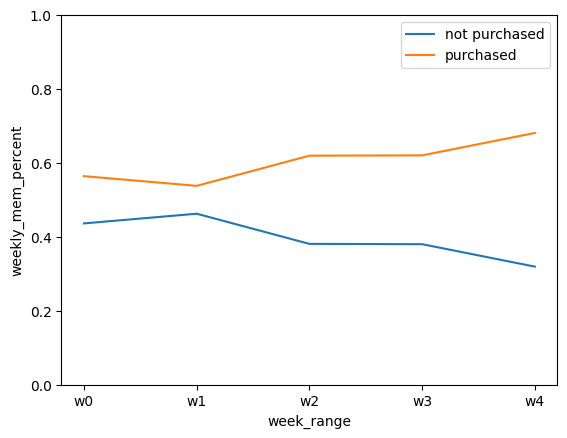

In [54]:
plt.ylim(0,1)
sns.lineplot(mem_no_count[['week_range','is_promotion','weekly_mem_percent']], x='week_range', y='weekly_mem_percent', hue='is_promotion', errorbar=None)
plt.legend(['not purchased', 'purchased'])

- 특가 상품 구매 코호트가 1주 지난 시점부터 높은 리텐션을 보임
- 첫 구매 특가 상품 프로모션 유지하는 방향으로 의사 결정